# Verify AlphaFold accuracy for 100 targets
Subset: target_subset_how_eq_random_num_100_seed_0

Set the target numbers of `is_similar_AF2` and not `is_similar_AF2` equal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (5, 3)
from scipy import stats

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
label_df

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0       model_1_ptm_seed_0_rec_10_ens_1    0.829   0.791   0.725        0.858   
1        model_1_ptm_seed_0_rec_1_ens_1    0.830   0.795   0.733        0.864   
2        model_1_ptm_seed_0_rec_2_ens_1    0.830   0.793   0.733        0.862   
3        model_1_ptm_seed_0_rec_3_ens_1    0.830   0.793   0.735        0.862   
4        model_1_ptm_seed_0_rec_4_ens_1    0.830   0.791   0.732        0.860   
...                                 ...      ...     ...     ...          ...   
106795       model_5_seed_1_rec_7_ens_8    0.928   0.933   0.877        0.895   
106796       model_5_seed_1_rec_8_ens_1    0.929   0.935   0.879        0.895   
106797       model_5_seed_1_rec_8_ens_8    0.928   0.933   0.875        0.896   
106798       model_5_seed_1_rec_9_ens_1    0.928   0.933   0.879        0.896   
106799       model_5_seed_1_rec_9_ens_8    0.928   0.933   0.875        0.895   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  Seed  Recycle  \
0           0.858  0.897     0.855      0.422  model_1_ptm     0       10   
1           0.864  0.905     0.875     36.027  model_1_ptm     0        1   
2           0.862  0.900     0.863      7.015  model_1_ptm     0        2   
3           0.862  0.895     0.851      0.720  model_1_ptm     0        3   
4           0.860  0.898     0.859      1.855  model_1_ptm     0        4   
...           ...    ...       ...        ...          ...   ...      ...   
106795      0.872  0.860       NaN      0.135      model_5     1        7   
106796      0.872  0.859       NaN      0.335      model_5     1        8   
106797      0.873  0.860       NaN      0.130      model_5     1        8   
106798      0.873  0.861       NaN      0.435      model_5     1        9   
106799      0.872  0.860       NaN      0.137      model_5     1        9   

        Ensemble  Target  Num_diff  Num_missing  Length  
0              1  5WM2_A         0           28     564  
1              1  5WM2_A         0           28     564  
2              1  5WM2_A         0           28     564  
3              1  5WM2_A         0           28     564  
4              1  5WM2_A         0           28     564  
...          ...     ...       ...          ...     ...  
106795         8  6SAN_A         0           25     137  
106796         1  6SAN_A         0           25     137  
106797         8  6SAN_A         0           25     137  
106798         1  6SAN_A         0           25     137  
106799         8  6SAN_A         0           25     137  

[106800 rows x 17 columns]

In [4]:
target_df = pd.read_csv(target_list, index_col=0)
target_df

id  resolution           releasedate  \
0    5WM2_A       1.548  2018-05-23T00:00:00Z   
1    6R9H_A       2.000  2021-02-03T00:00:00Z   
2    6W1T_D       2.010  2020-05-13T00:00:00Z   
3    6XIP_B       1.500  2020-07-01T00:00:00Z   
4    6D0C_B       1.500  2018-10-31T00:00:00Z   
..      ...         ...                   ...   
295  5ZY6_A       2.099  2019-05-22T00:00:00Z   
296  6HNI_A       1.350  2019-08-28T00:00:00Z   
297  6IG4_A       2.261  2019-07-10T00:00:00Z   
298  6GPA_A       1.790  2018-12-26T00:00:00Z   
299  6SAN_A       1.360  2020-03-18T00:00:00Z   

                                                header  \
0    >5wm2_A mol:protein length:564  Salicylate-AMP...   
1           >6r9h_A mol:protein length:166  Syntenin-1   
2    >6w1t_D mol:protein length:352  Photosystem II...   
3    >6xip_B mol:protein length:122  Non-structural...   
4    >6d0c_B mol:protein length:121  Aryl hydrocarb...   
..                                                 ...   
295  >5zy6_A mol:protein length:274  Probable catec...   
296  >6hni_A mol:protein length:319  ABC-type trans...   
297  >6ig4_A mol:protein length:313  Phosphatidate ...   
298  >6gpa_A mol:protein length:314  Arabinogalacta...   
299  >6san_A mol:protein length:137  Deleted in mal...   

                                              sequence  length  \
0    MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...     564   
1    GAMDPREVILCKDQDGKIGLRLKSIDNGIFVQLVQANSPASLVGLR...     166   
2    MTIAIGRAPAERGWFDILDDWLKRDRFVFVGWSGILLFPCAYLALG...     352   
3    EDKRAKVTSAMQTMLFTMLRKLDNDALNNIINNARDGCVPLNIIPL...     122   
4    GEFKGLNVCQPTRFISRHNIEGIFTFVDHRCVATVGYQPQELLGKN...     121   
..                                                 ...     ...   
295  HHHHHHHHMPHMEDNGSEKEQLFLQHIQNLPQERLDAIRGHPELVL...     274   
296  SMASQGGDSGNSKQESNSKDKEVKKIGITQLVEHPALDATRTGFVK...     319   
297  MGSSHHHHHHSSGLVPRGSHMSHHAKCTVAQLLKQNLLTFENQRIQ...     313   
298  VVKEEGFARGADVSWLTQMEAEGLKFYTPDENRQEMECMDLLRDYC...     314   
299  MKLCILLAVVAFVGLSLGGSESSLALRLVNGGDRCQGRVEVLYQGS...     137   

     num_entry_in_cluster  num_entry_in_cluster_AF2_notInclude  is_similar_AF2  
0                      24                                   10            True  
1                      28                                    8            True  
2                     164                                   79            True  
3                      15                                   14            True  
4                      33                                    9            True  
..                    ...                                  ...             ...  
295                     4                                    4           False  
296                     3                                    3           False  
297                     6                                    6           False  
298                     2                                    2           False  
299                     4                                    4           False  

[300 rows x 9 columns]

In [5]:
target_df['is_similar_AF2'].value_counts()

False    150
True     150
Name: is_similar_AF2, dtype: int64

In [6]:
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0       model_1_ptm_seed_0_rec_10_ens_1    0.829   0.791   0.725        0.858   
1        model_1_ptm_seed_0_rec_1_ens_1    0.830   0.795   0.733        0.864   
2        model_1_ptm_seed_0_rec_2_ens_1    0.830   0.793   0.733        0.862   
3        model_1_ptm_seed_0_rec_3_ens_1    0.830   0.793   0.735        0.862   
4        model_1_ptm_seed_0_rec_4_ens_1    0.830   0.791   0.732        0.860   
...                                 ...      ...     ...     ...          ...   
106795       model_5_seed_1_rec_7_ens_8    0.928   0.933   0.877        0.895   
106796       model_5_seed_1_rec_8_ens_1    0.929   0.935   0.879        0.895   
106797       model_5_seed_1_rec_8_ens_8    0.928   0.933   0.875        0.896   
106798       model_5_seed_1_rec_9_ens_1    0.928   0.933   0.879        0.896   
106799       model_5_seed_1_rec_9_ens_8    0.928   0.933   0.875        0.895   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...  Length  \
0           0.858  0.897     0.855      0.422  model_1_ptm  ...     564   
1           0.864  0.905     0.875     36.027  model_1_ptm  ...     564   
2           0.862  0.900     0.863      7.015  model_1_ptm  ...     564   
3           0.862  0.895     0.851      0.720  model_1_ptm  ...     564   
4           0.860  0.898     0.859      1.855  model_1_ptm  ...     564   
...           ...    ...       ...        ...          ...  ...     ...   
106795      0.872  0.860       NaN      0.135      model_5  ...     137   
106796      0.872  0.859       NaN      0.335      model_5  ...     137   
106797      0.873  0.860       NaN      0.130      model_5  ...     137   
106798      0.873  0.861       NaN      0.435      model_5  ...     137   
106799      0.872  0.860       NaN      0.137      model_5  ...     137   

            id  resolution           releasedate  \
0       5WM2_A       1.548  2018-05-23T00:00:00Z   
1       5WM2_A       1.548  2018-05-23T00:00:00Z   
2       5WM2_A       1.548  2018-05-23T00:00:00Z   
3       5WM2_A       1.548  2018-05-23T00:00:00Z   
4       5WM2_A       1.548  2018-05-23T00:00:00Z   
...        ...         ...                   ...   
106795  6SAN_A       1.360  2020-03-18T00:00:00Z   
106796  6SAN_A       1.360  2020-03-18T00:00:00Z   
106797  6SAN_A       1.360  2020-03-18T00:00:00Z   
106798  6SAN_A       1.360  2020-03-18T00:00:00Z   
106799  6SAN_A       1.360  2020-03-18T00:00:00Z   

                                                   header  \
0       >5wm2_A mol:protein length:564  Salicylate-AMP...   
1       >5wm2_A mol:protein length:564  Salicylate-AMP...   
2       >5wm2_A mol:protein length:564  Salicylate-AMP...   
3       >5wm2_A mol:protein length:564  Salicylate-AMP...   
4       >5wm2_A mol:protein length:564  Salicylate-AMP...   
...                                                   ...   
106795  >6san_A mol:protein length:137  Deleted in mal...   
106796  >6san_A mol:protein length:137  Deleted in mal...   
106797  >6san_A mol:protein length:137  Deleted in mal...   
106798  >6san_A mol:protein length:137  Deleted in mal...   
106799  >6san_A mol:protein length:137  Deleted in mal...   

                                                 sequence  length  \
0       MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...     564   
1       MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...     564   
2       MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...     564   
3       MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...     564   
4       MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...     564   
...                                                   ...     ...   
106795  MKLCILLAVVAFVGLSLGGSESSLALRLVNGGDRCQGRVEVLYQGS...     137   
106796  MKLCILLAVVAFVGLSLGGSESSLALRLVNGGDRCQGRVEVLYQGS...     137   
106797  MKLCILLAVVAFVGLSLGGSESSLALRLVNGGDRCQGRVEVLYQGS...     137   
106798  MKLCILLAVVAFVGLSLGGSESSLALRLVNGGDRCQGRVEVLYQGS...     137   
106799  MKLCILLAVVAFVGLSLGGSESSLALRLVNGGDRC

In [7]:
# Check target number
targets = df['Target'].unique().tolist()
print(len(targets))

300


In [8]:
# Check target number that does not have LDDT score
df.groupby('Target').head(1)['Global_LDDT'].isnull().sum()

18

## Model Quality

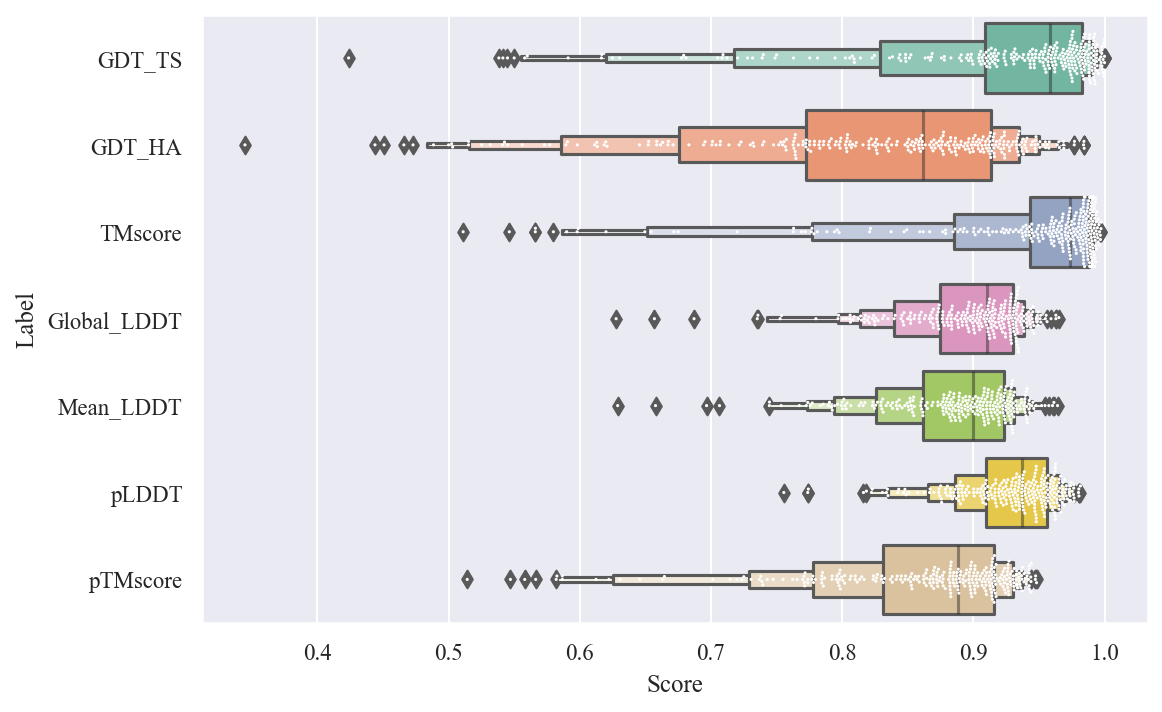

In [9]:
# max value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
# xticks_max = 1.1
# plt.xlim(None, 1.15)
# xticks = np.append(np.arange(0.2, 1.2, 0.2), [xticks_max])
# xticks_str = list(map(lambda x: str(x)[:3], xticks))
# xticks_str[-1] = 'Mean'
# plt.xticks(xticks, xticks_str)
# plt.axvline(x=xticks_max, color=(234/255, 234/255, 242/255))
# mean_series = label_max_df.groupby('Label').mean()['Score']
# for i, label in enumerate(labels):
#     value = mean_series[label]
#     plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
plt.savefig(fig_dir / 'max_value_each_labels.png')


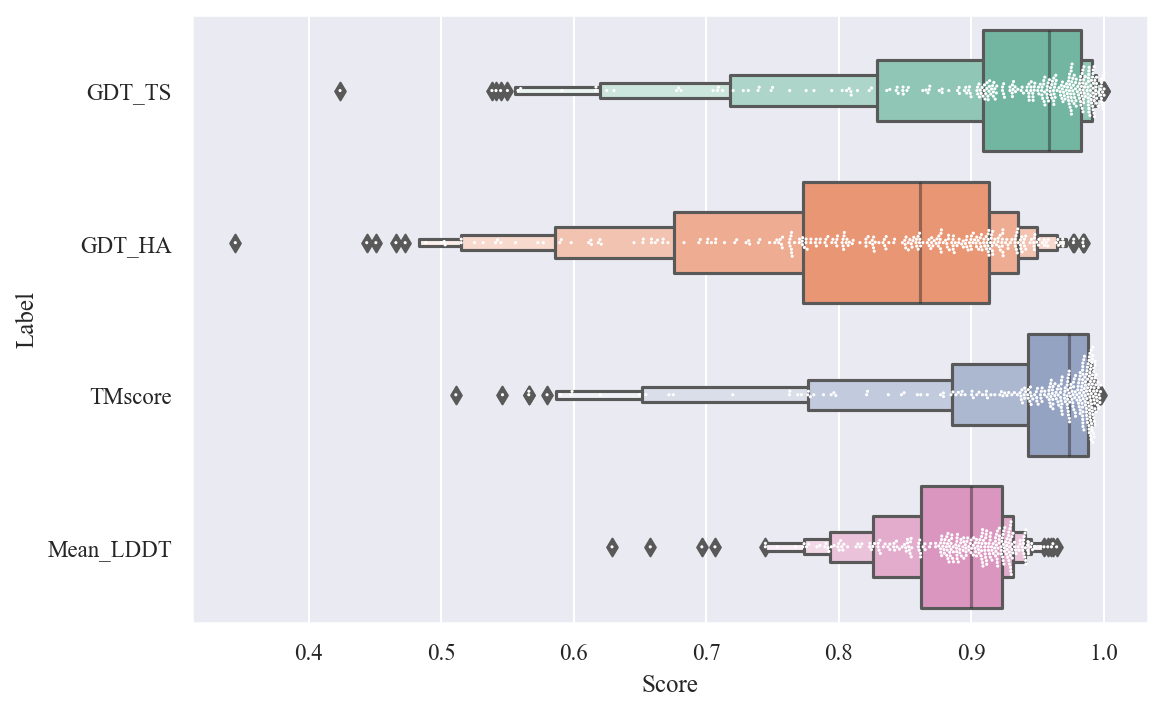

In [10]:
# max value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
# xticks_max = 1.1
# plt.xlim(None, 1.15)
# xticks = np.append(np.arange(0.2, 1.2, 0.2), [xticks_max])
# xticks_str = list(map(lambda x: str(x)[:3], xticks))
# xticks_str[-1] = 'Mean'
# plt.xticks(xticks, xticks_str)
# plt.axvline(x=xticks_max, color=(234/255, 234/255, 242/255))
# mean_series = label_max_df.groupby('Label').mean()['Score']
# for i, label in enumerate(labels):
#     value = mean_series[label]
#     plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
# plt.savefig(fig_dir / 'max_value_each_labels.png')

### Verify whether the quality of the predicted structure changes between targets that have similar sequences in the AlphaFold training data and targets that do not

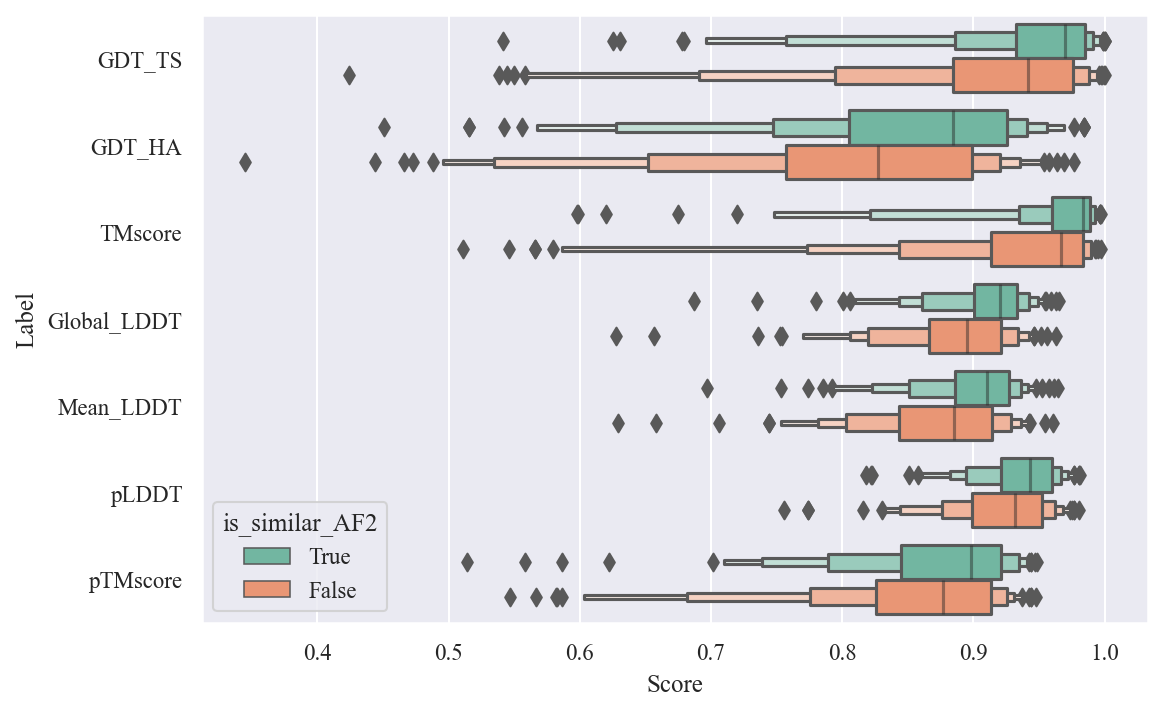

In [11]:
# max value for each label
# Targets whose similar sequence is included in AF2 training dataset or not
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2', hue='is_similar_AF2', hue_order=[True, False])
plt.tight_layout()
plt.savefig(fig_dir / 'max_value_each_labels_similar_training.png')

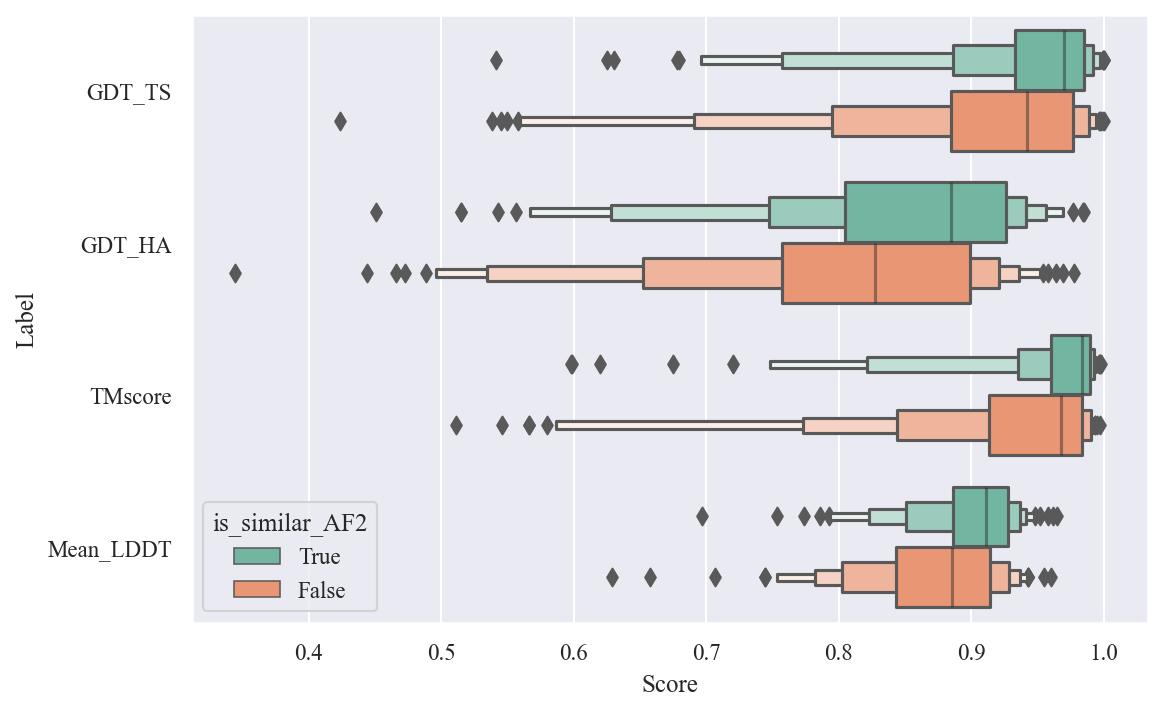

In [12]:
# max value for each label
# Targets whose similar sequence is included in AF2 training dataset or not
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2', hue='is_similar_AF2', hue_order=[True, False])
plt.tight_layout()
# plt.savefig(fig_dir / 'max_value_each_labels_similar_training.png')

In [13]:
# Statistical test
similar_df = label_max_df[label_max_df['is_similar_AF2'] == True]
not_similar_df = label_max_df[label_max_df['is_similar_AF2'] == False]
for label in labels:
    print(label)
    x = similar_df.query('Label == @label')['Score']
    y = not_similar_df.query('Label == @label')['Score']
    print(f'{x.mean():.3f}, {y.mean():.3f}')
    result = stats.mannwhitneyu(x, y)
    print(result)

GDT_TS
0.939, 0.902
MannwhitneyuResult(statistic=8480.0, pvalue=0.00011365790440643131)
GDT_HA
0.852, 0.801
MannwhitneyuResult(statistic=8169.0, pvalue=2.0611962683992798e-05)
TMscore
0.956, 0.926
MannwhitneyuResult(statistic=7927.5, pvalue=4.8890728482249305e-06)
Mean_LDDT
0.899, 0.873
MannwhitneyuResult(statistic=8086.0, pvalue=1.2712839339296448e-05)


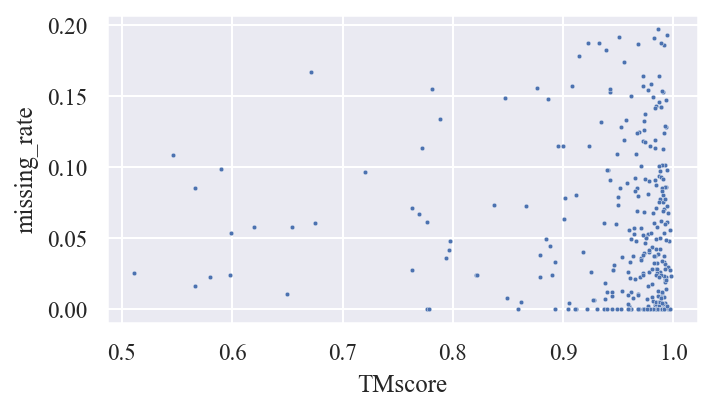

In [14]:
# Relationship between TMscore and ratio of missing residues
max_tmscore_df = df.groupby('Target').max('TMscore')
max_tmscore_df['missing_rate'] = max_tmscore_df['Num_missing'] / max_tmscore_df['Length']
sns.scatterplot(data=max_tmscore_df, x='TMscore', y='missing_rate', s=5)
plt.tight_layout()

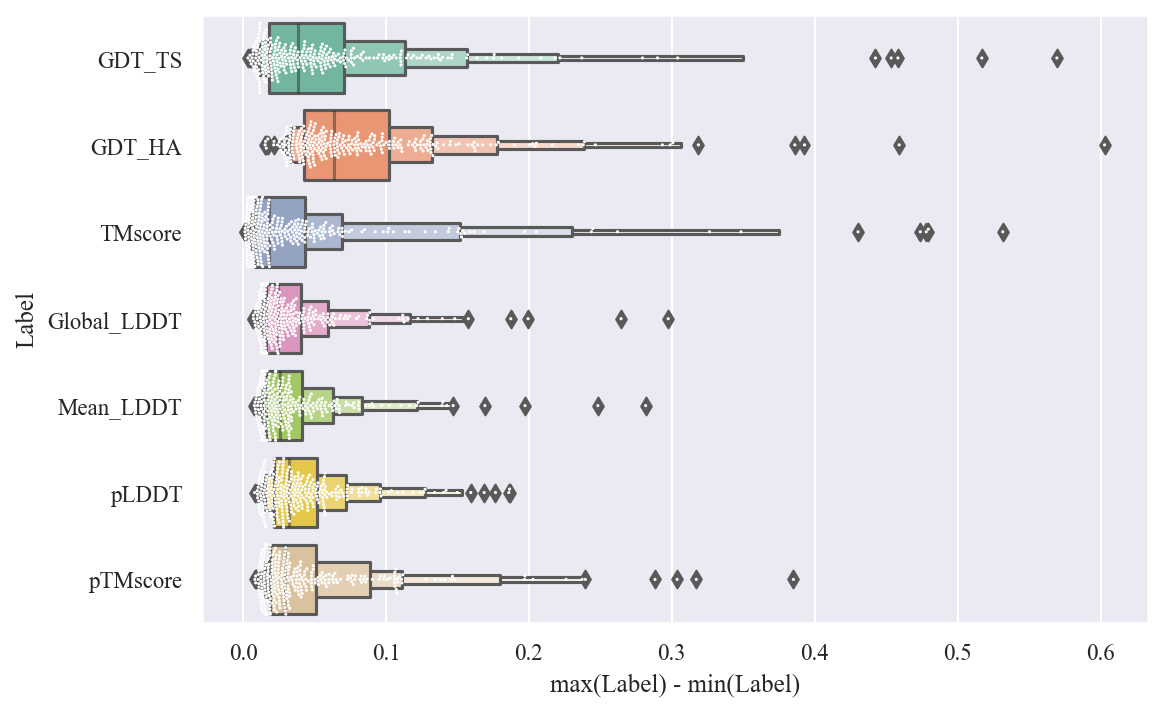

In [15]:
# max value - min value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

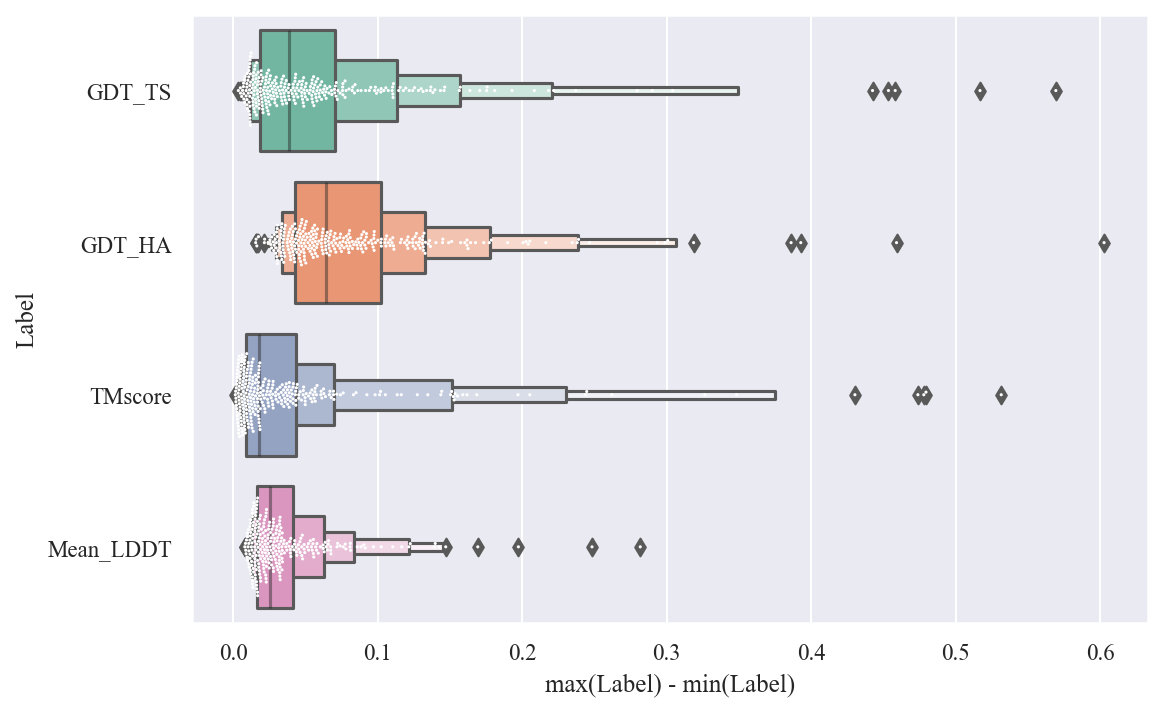

In [16]:
# max value - min value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
# plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

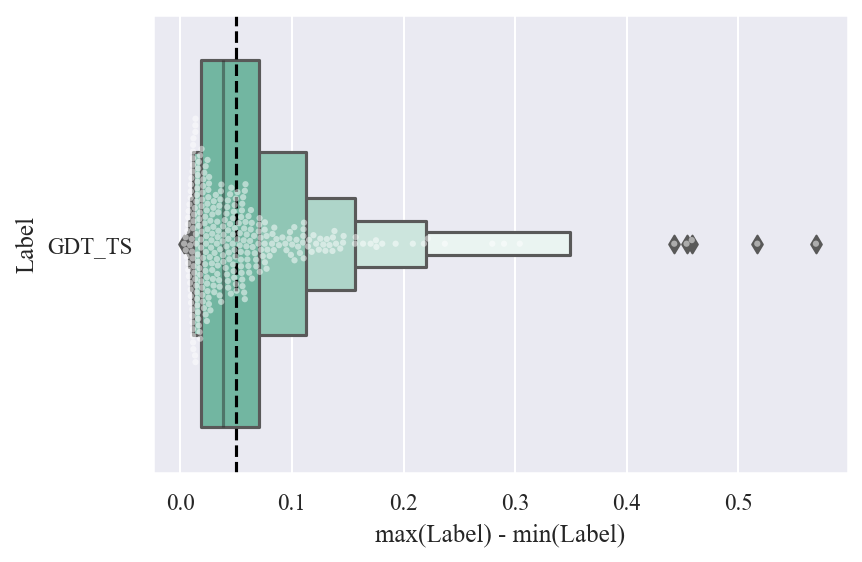

In [17]:
# max value - min value for each label
label_max_datas = []
labels = ['GDT_TS']
# labels = ['GDT_TS', 'GDT_HA', 'TMscore']
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(6, 4))
# plt.axvline(x=0.05, color='black', linestyle='--')
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=3, alpha=0.5)
plt.axvline(x=0.05, color='black', linestyle='--')
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
# plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

In [18]:
# Count target number whose value difference between max and min is larger than threshold
label = 'GDT_TS'
fil_df = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() >= 0.05)
print(fil_df['Target'].unique().size)
print(fil_df.groupby('Target').head(1)['is_similar_AF2'].value_counts())

117
False    59
True     58
Name: is_similar_AF2, dtype: int64


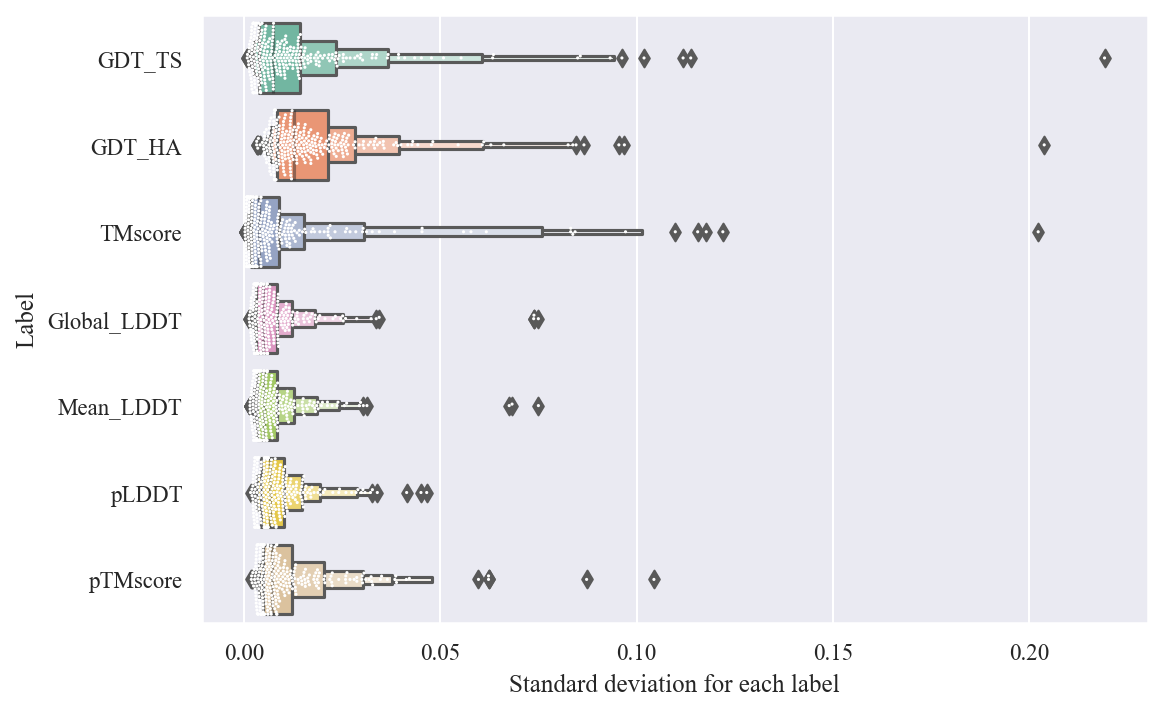

In [19]:
# Standard deviation for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    value=df.groupby('Target').std()[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel('Standard deviation for each label')
plt.tight_layout()
plt.savefig(fig_dir / 'std_each_labels.png')

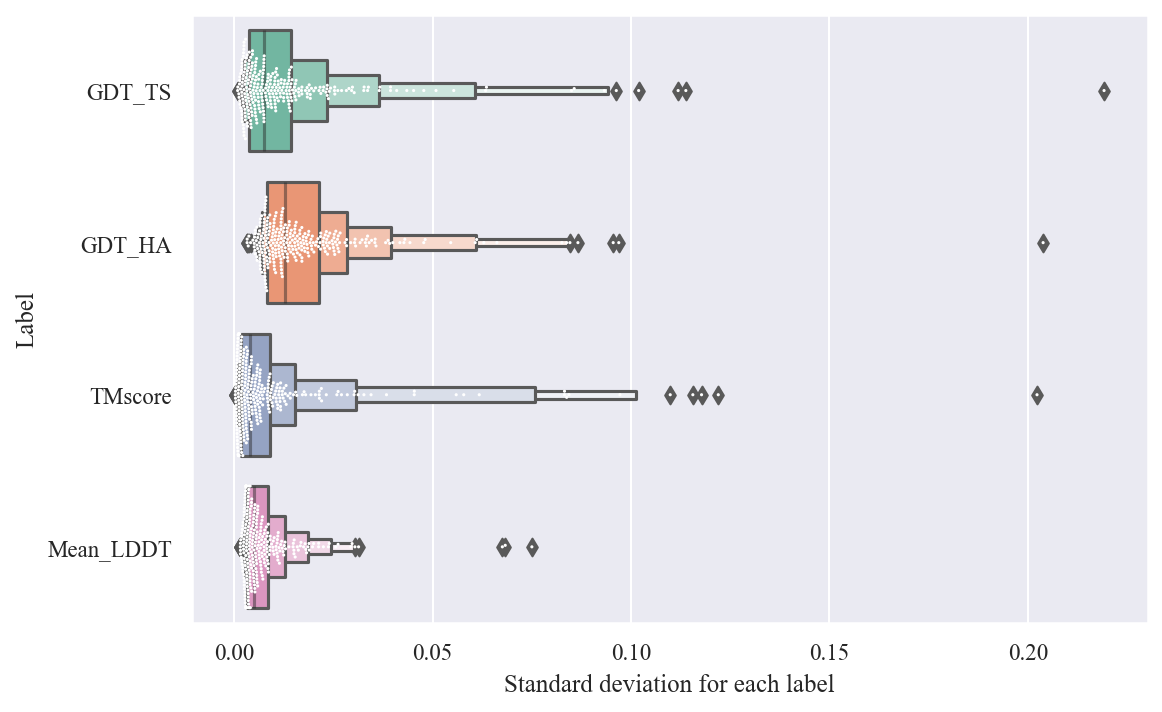

In [20]:
# Standard deviation for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    value=df.groupby('Target').std()[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel('Standard deviation for each label')
plt.tight_layout()
# plt.savefig(fig_dir / 'std_each_labels.png')

## Verify pLDDT and pTM

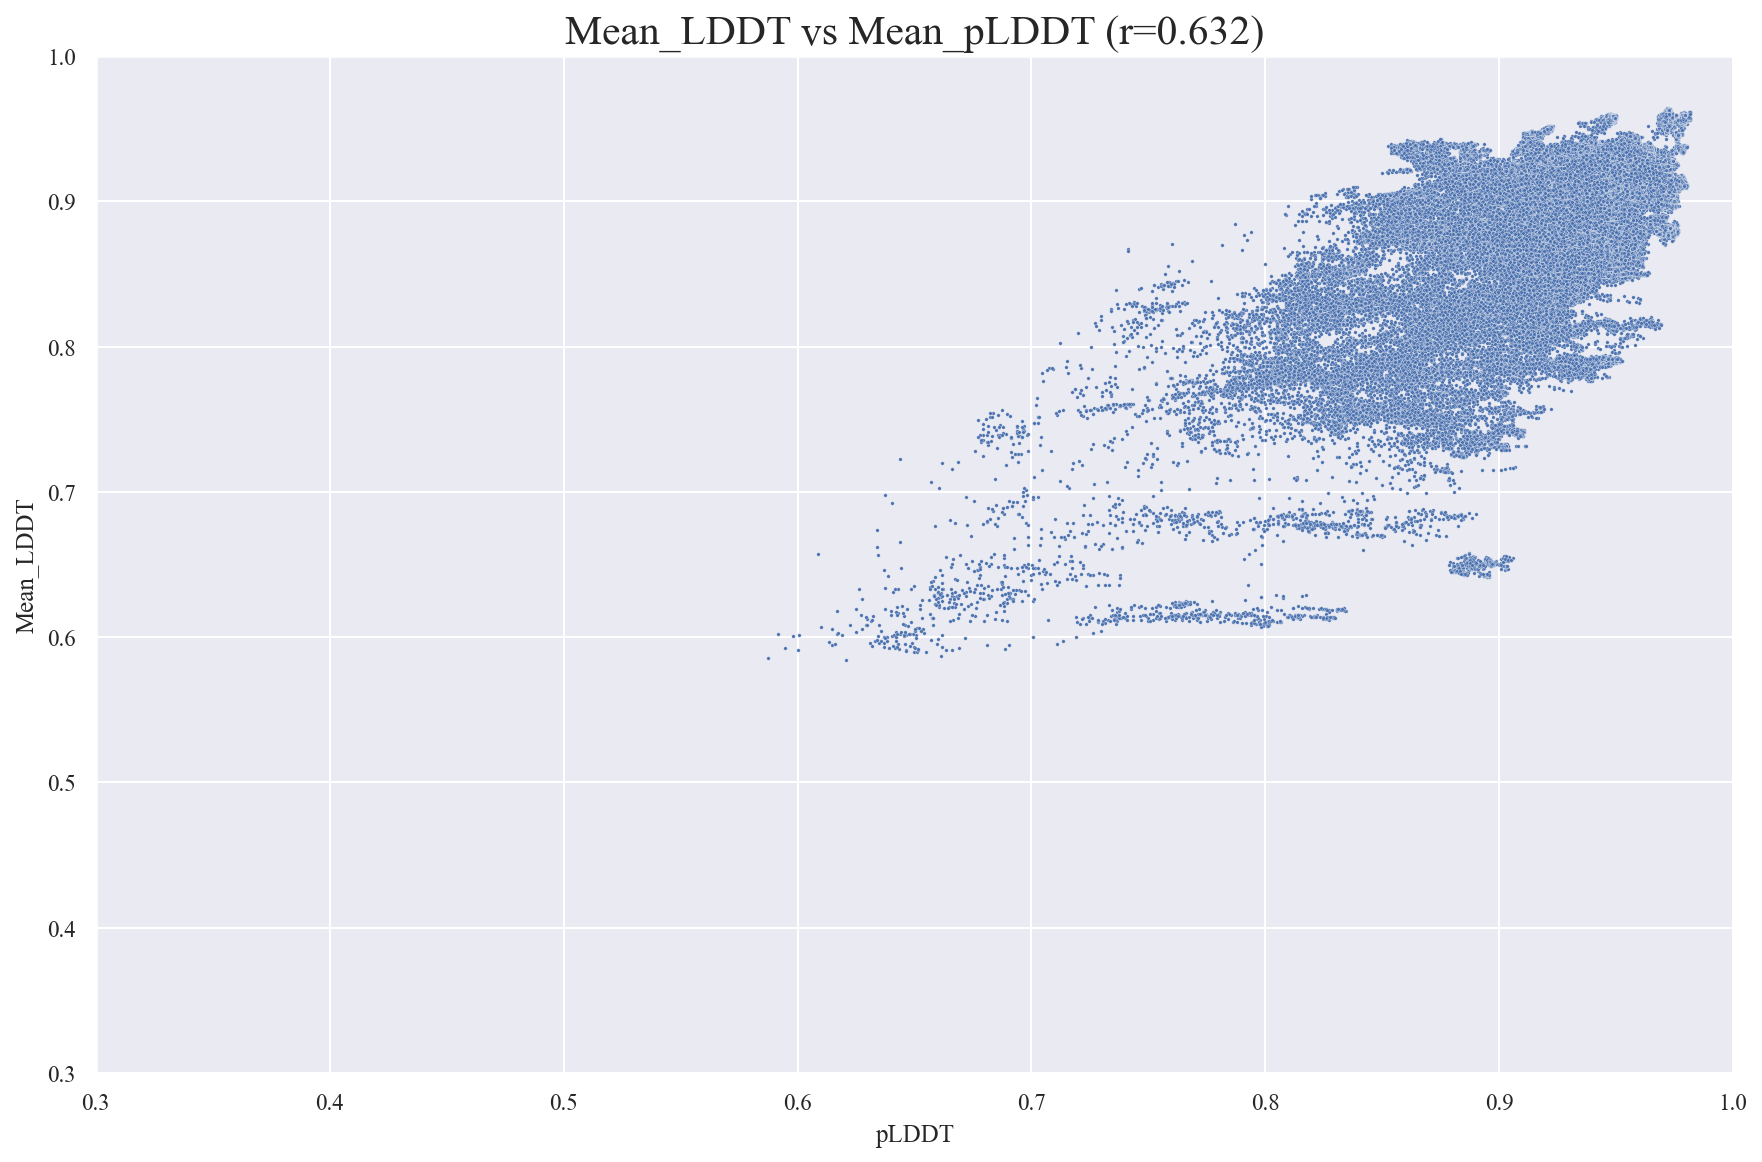

In [21]:
# Mean pLDDT vs Mean LDDT
label = 'Mean_LDDT'
score = 'pLDDT'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0.3, 1.0)
plt.ylim(0.3, 1.0)
plt.title(f'{label} vs Mean_{score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')


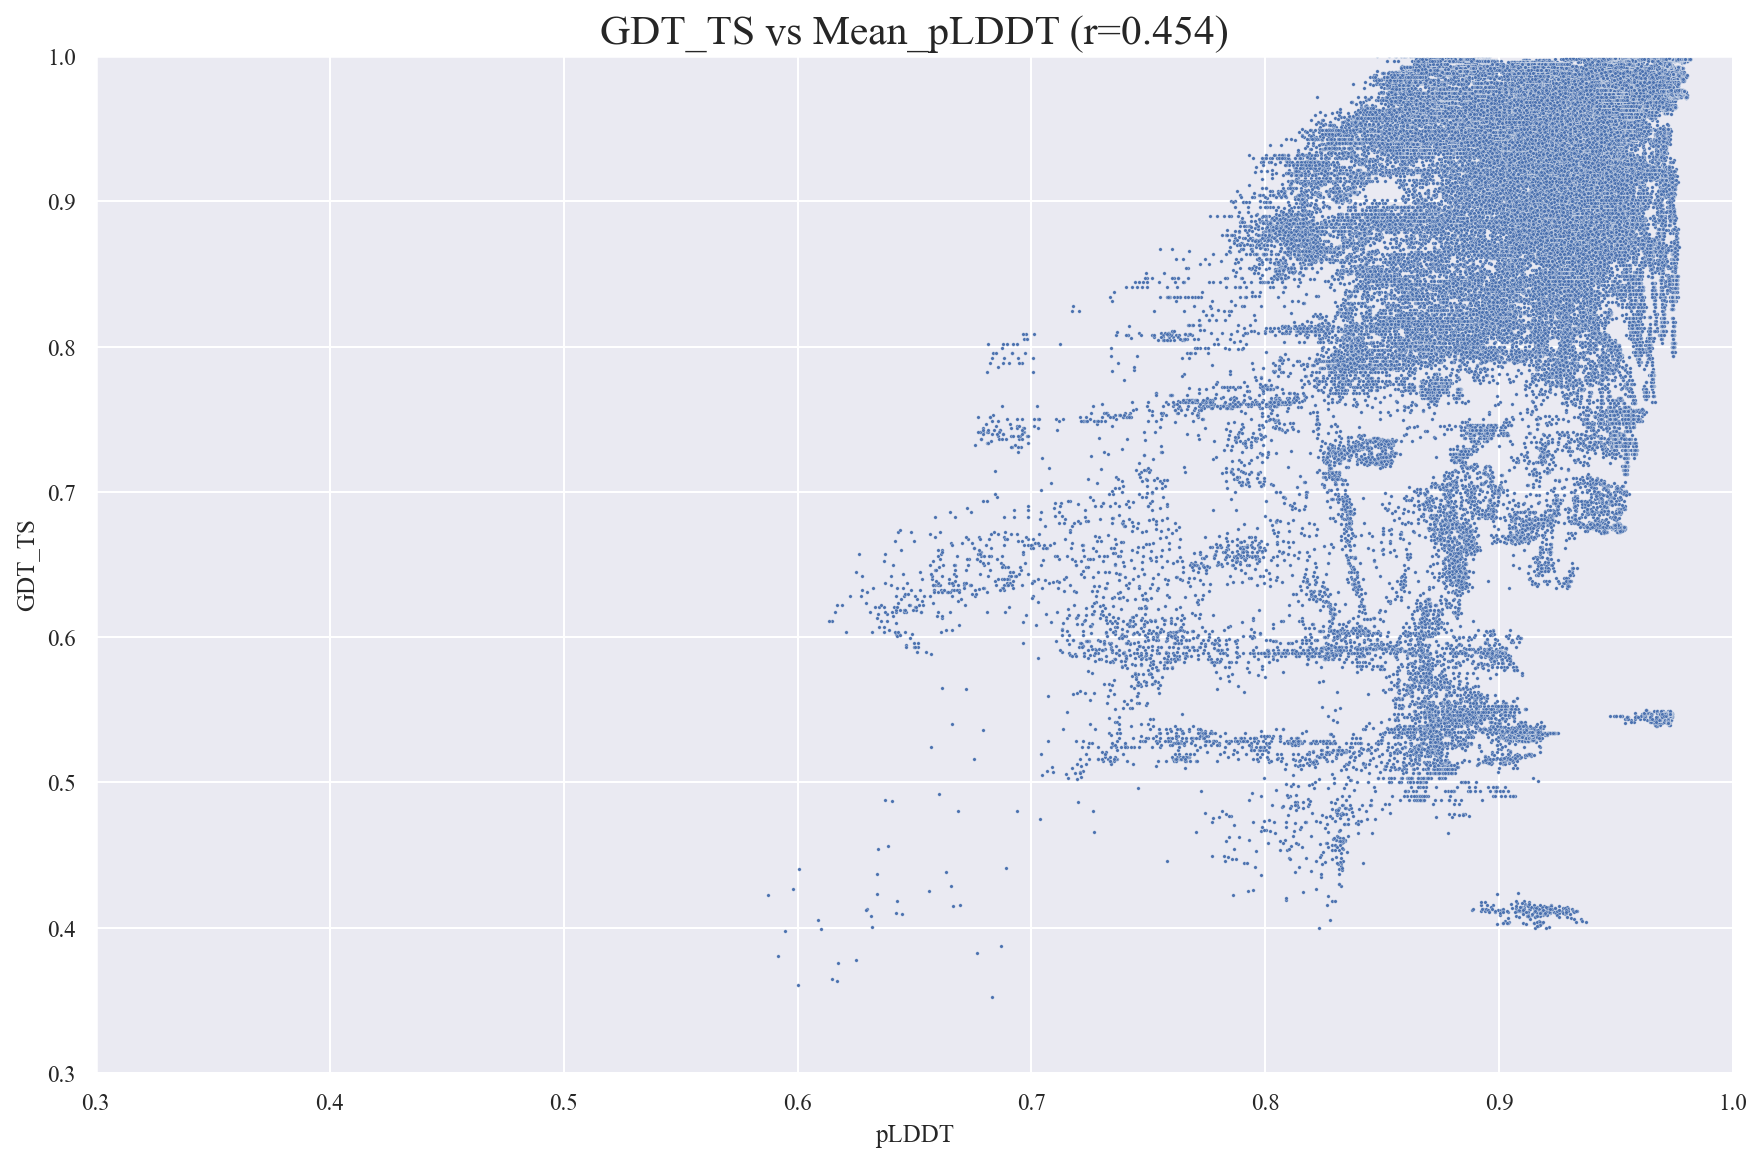

In [22]:
# Mean pLDDT vs GDT_TS
label = 'GDT_TS'
score = 'pLDDT'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0.3, 1.0)
plt.ylim(0.3, 1.0)
plt.title(f'{label} vs Mean_{score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')


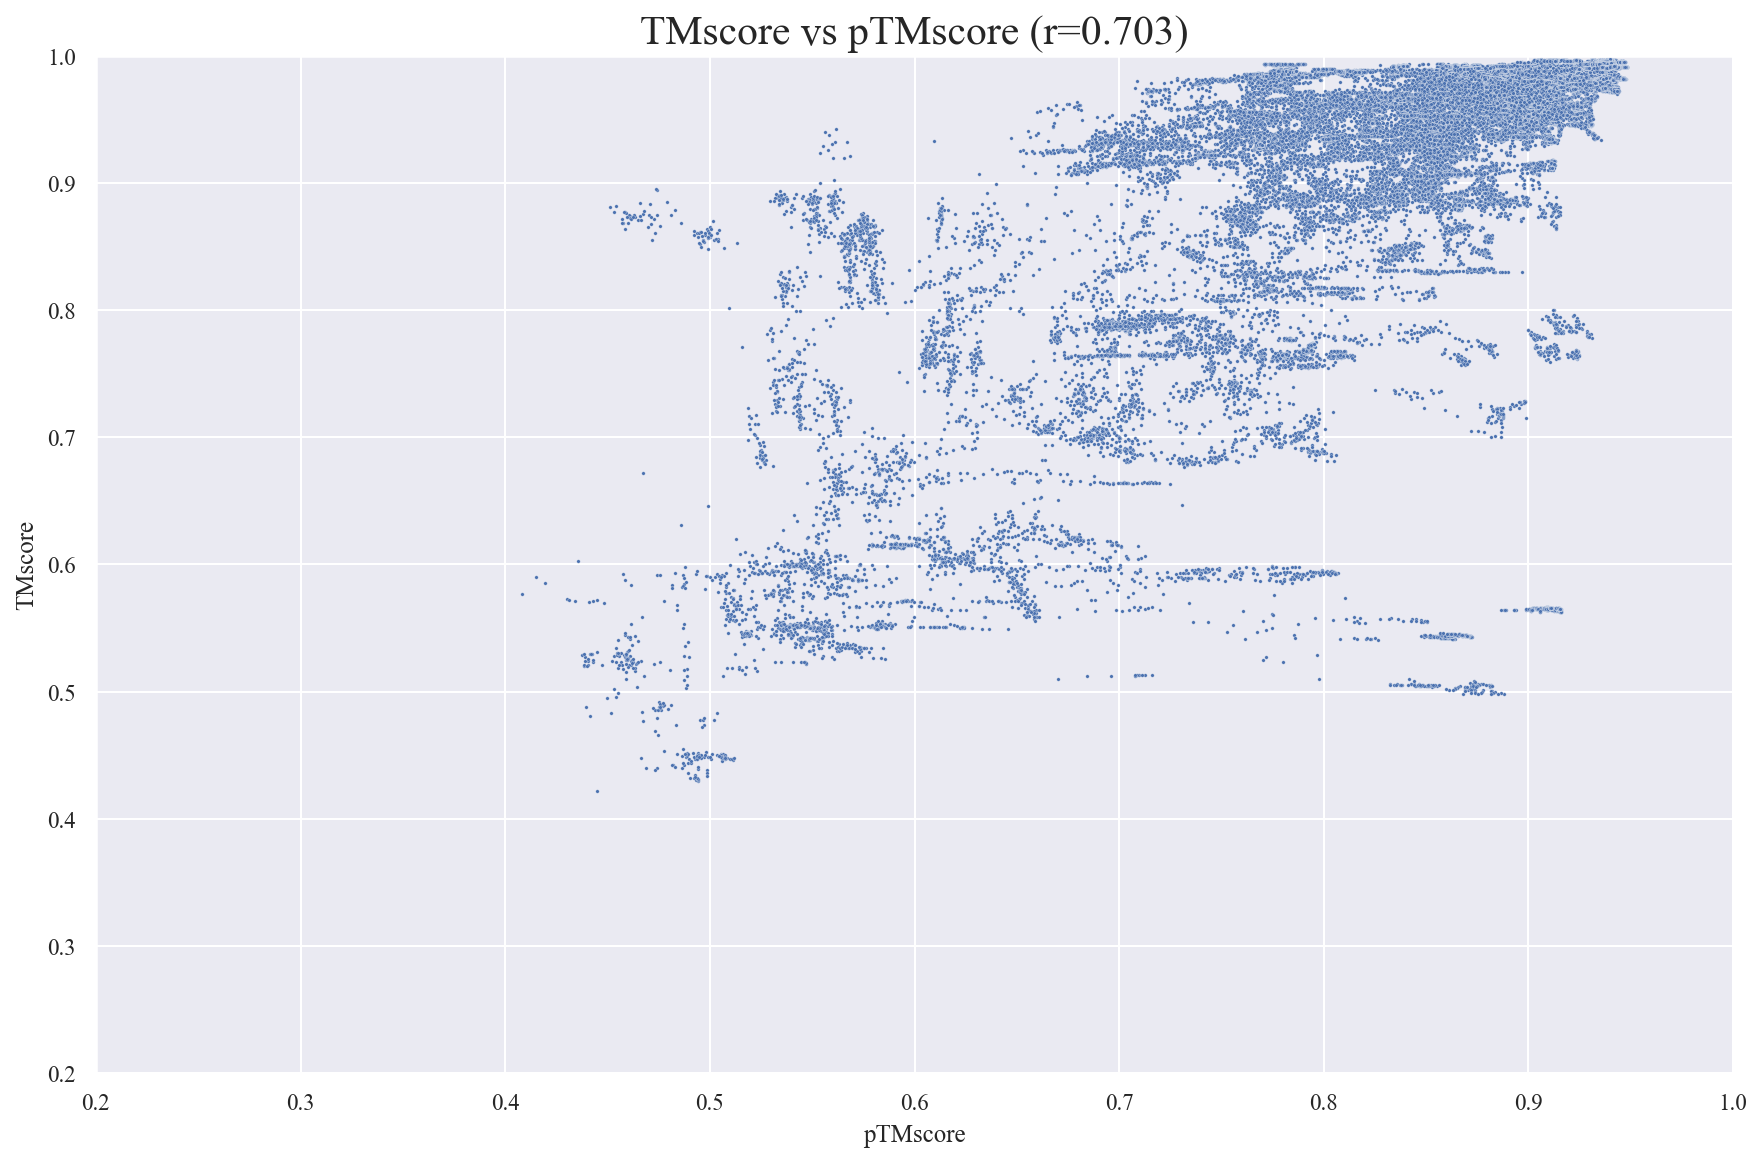

In [23]:
# pTMscore vs TMscore
label = 'TMscore'
score = 'pTMscore'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0.2, 1.0)
plt.ylim(0.2, 1.0)
plt.title(f'{label} vs {score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')

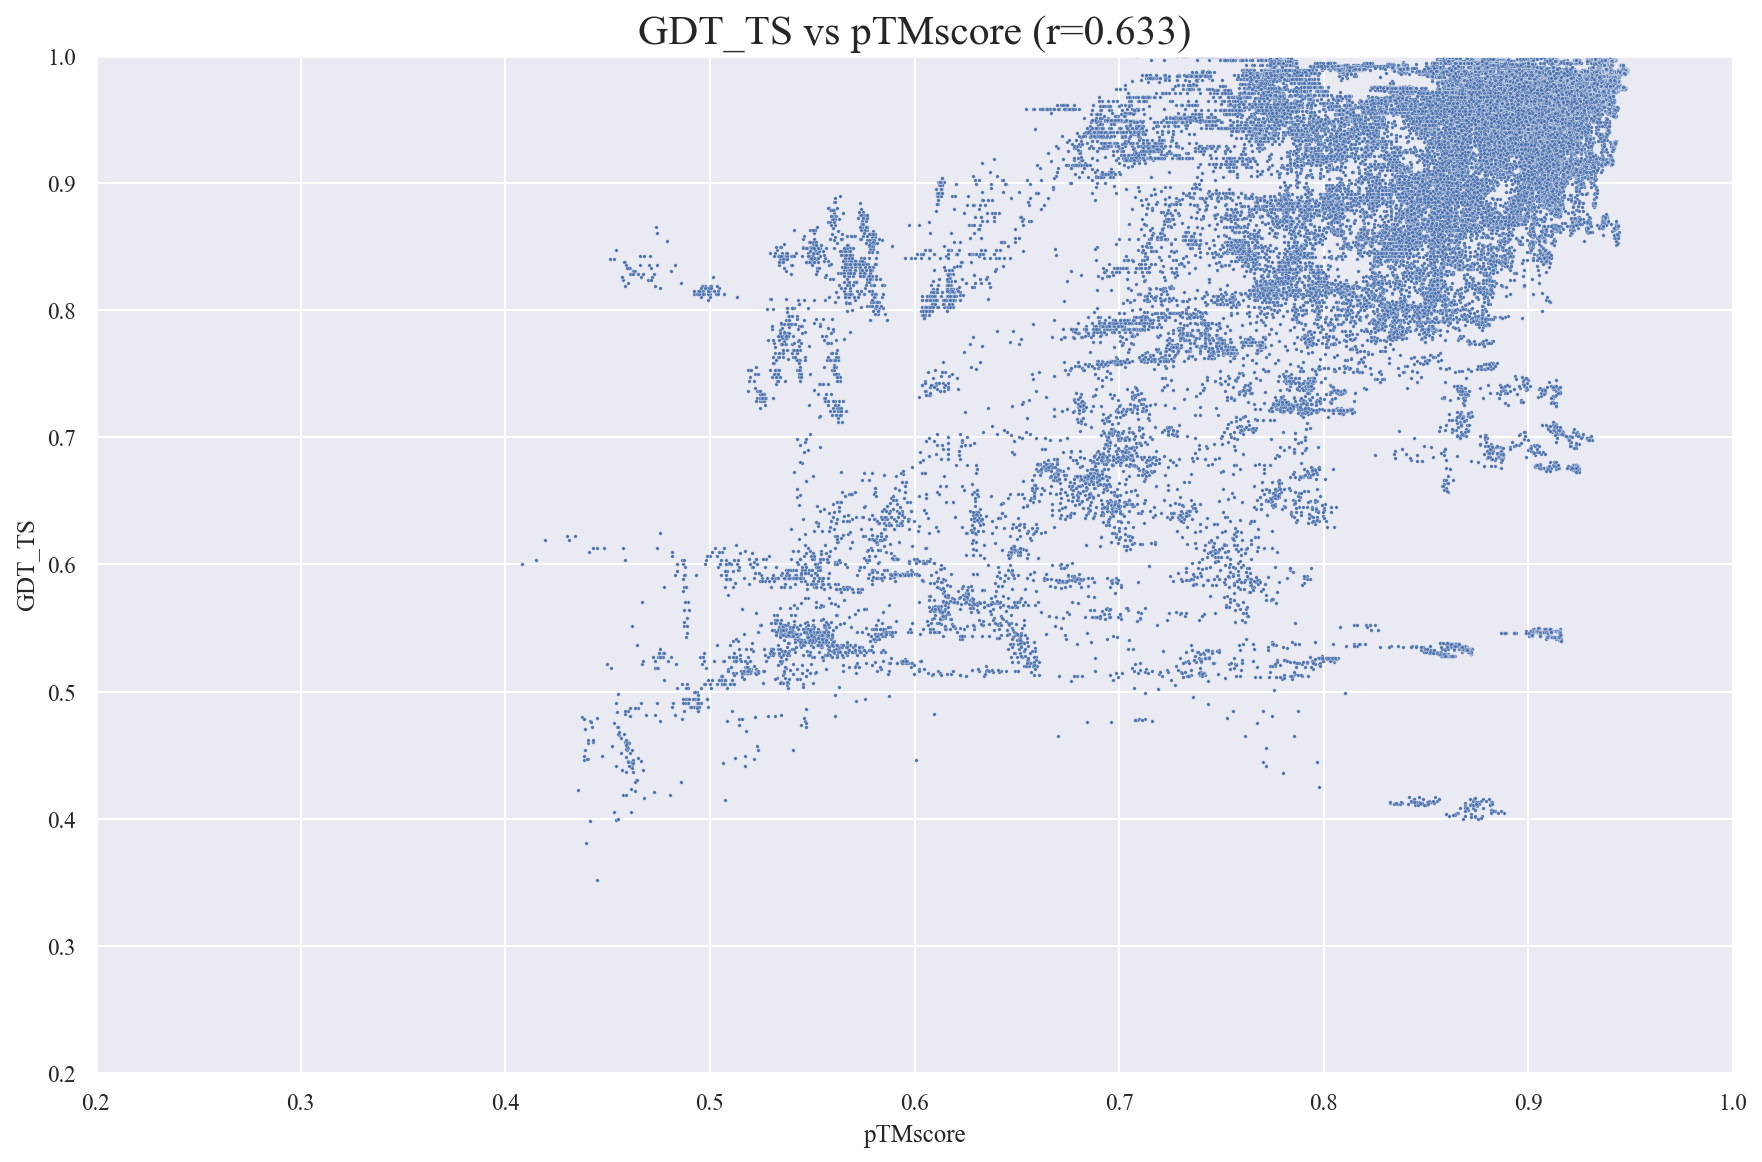

In [24]:
# pTMscore vs GDT_TS
label = 'GDT_TS'
score = 'pTMscore'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0.2, 1.0)
plt.ylim(0.2, 1.0)
plt.title(f'{label} vs {score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')

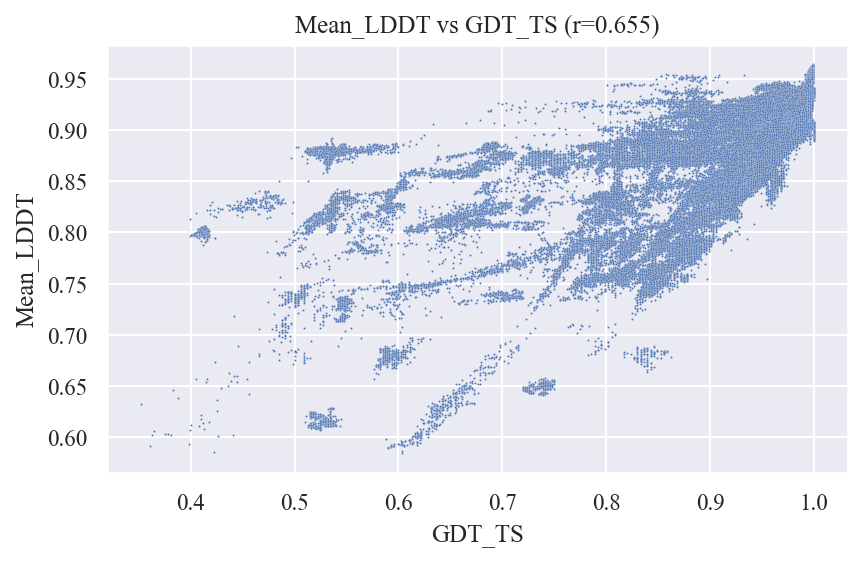

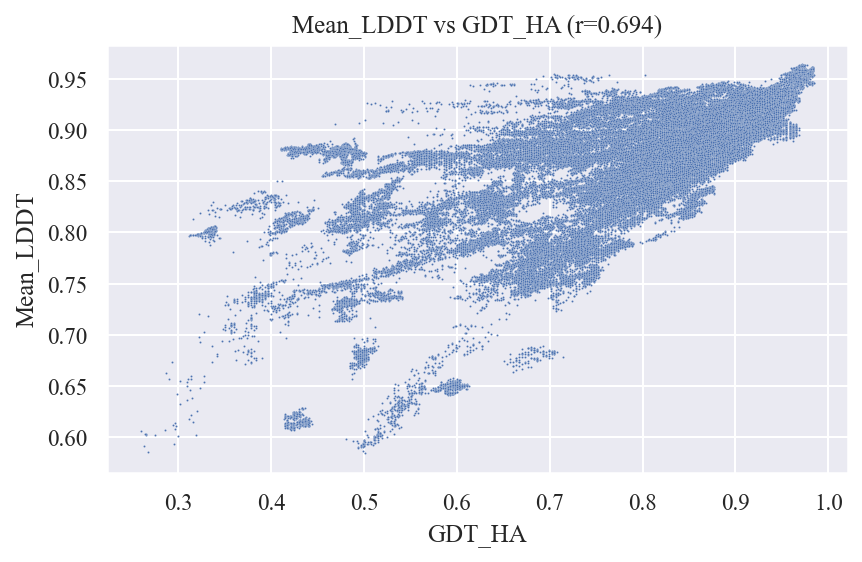

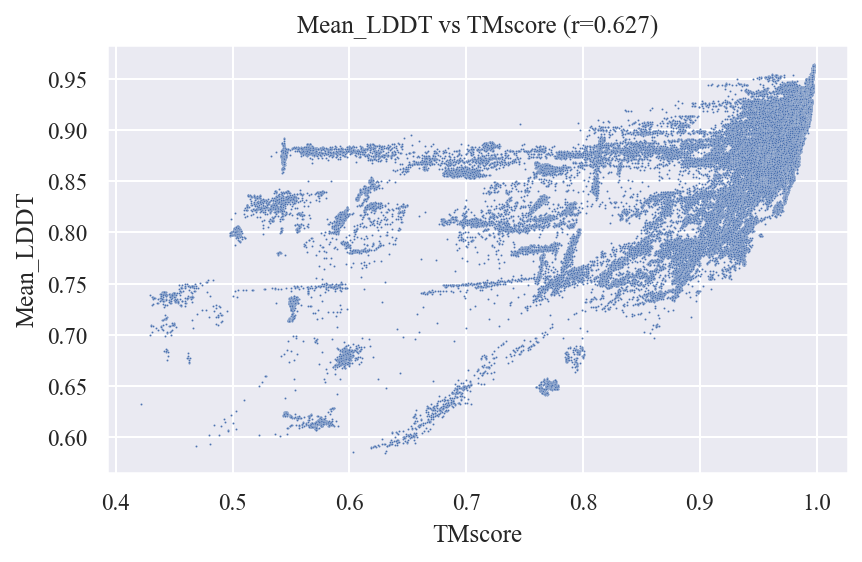

In [25]:
# Global score vs Mean local score
label = 'Mean_LDDT'
for label2 in ['GDT_TS', 'GDT_HA', 'TMscore']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=label2, y=label, s=1)
    cc = df.corr()[label][label2]
    plt.title(f'{label} vs {label2} (r={cc:.3f})')
    plt.tight_layout()
    plt.show()

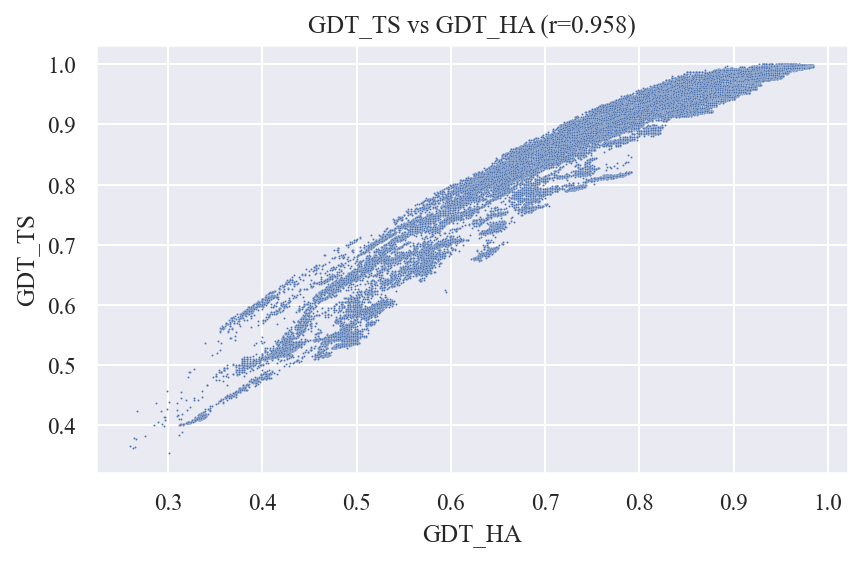

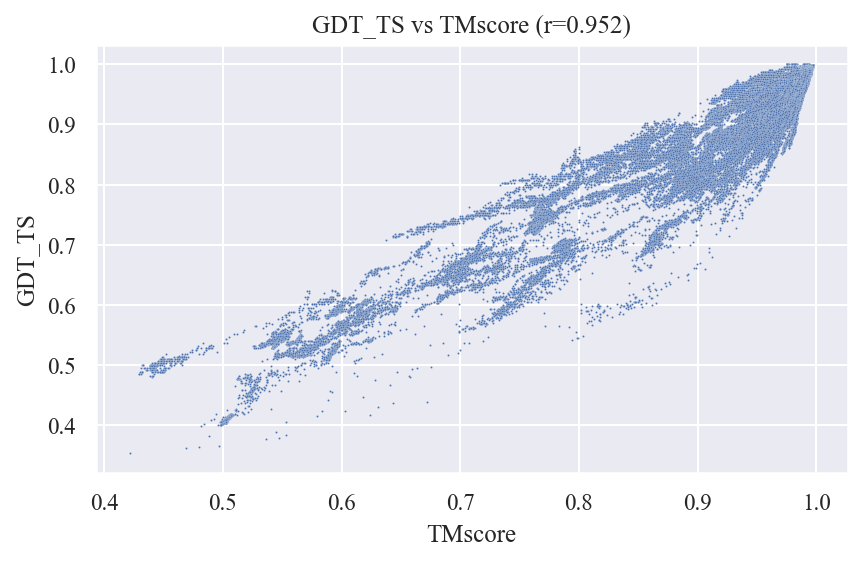

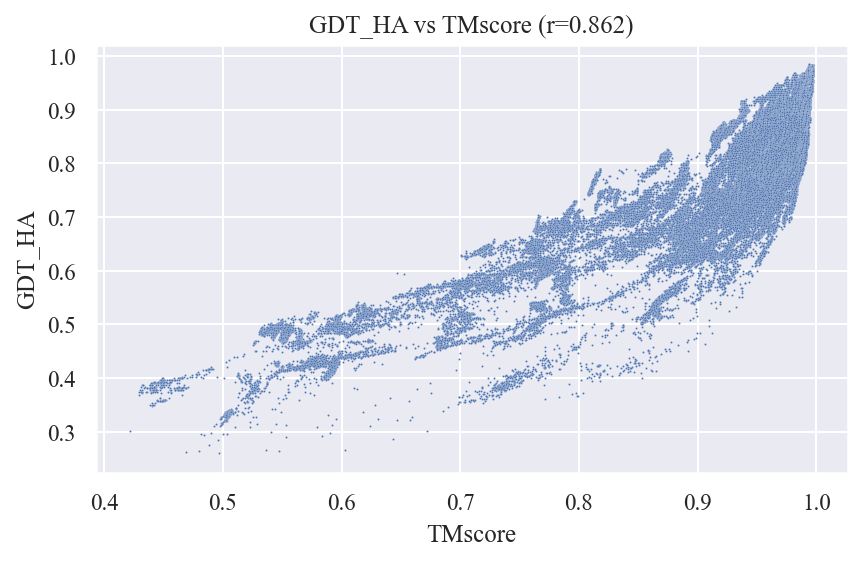

In [26]:
# Correlation between global labels
global_labels = ['GDT_TS', 'GDT_HA', 'TMscore']
for i, label1 in enumerate(global_labels):
    for label2 in global_labels[i + 1:]:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=label2, y=label1, s=1)
        cc = df.corr()[label1][label2]
        plt.title(f'{label1} vs {label2} (r={cc:.3f})')
        plt.tight_layout()
    plt.show()